<a href="https://colab.research.google.com/github/FGalvao77/RNA-rede-neural-artificial-para-deteccao-de-pneumonia-em-raio-x/blob/main/Construindo_uma_RNA_(rede_neural_artificial)_para_classifica%C3%A7%C3%A3o_de_raio_x_com_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo uma `RNA` (rede neural artificial) para classificação de _raio-x_ com pneumonia** 
---

Nesse projeto, iremos desenvolver um sistema para _classificação_ de imagens `raio-x`, utilizaremos uma RNA para nossa aplicação.

Esse sistema irar gerar uma janela para realização do `upload` de uma imagem de raio-x e, para posteriormente classificar em:
- **normal** ou,
- **pneumonia**

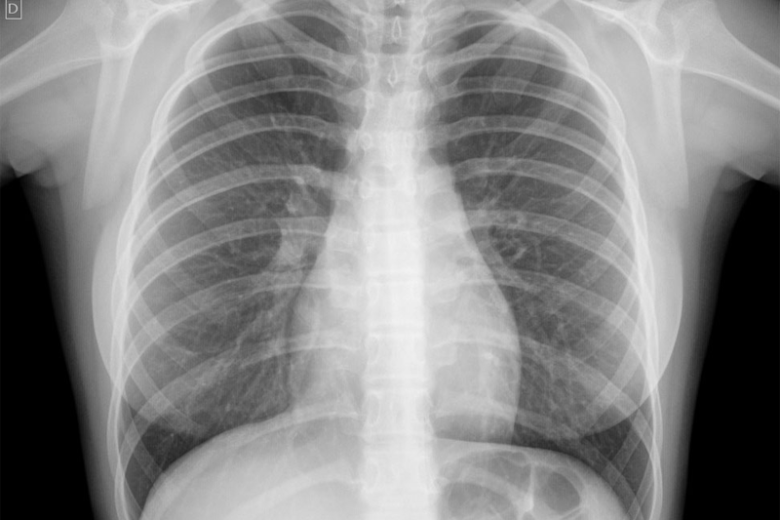

In [1]:
# verificando a versão do python utilizada no notebook
from platform import python_version 
print(python_version())

3.7.12


In [2]:
# visualizando o diretório principal
%ls

drive/  sample_data/


In [3]:
# visualizando as pastas presentes no "drive/MyDrive"
%ls drive/MyDrive/

 09.gdoc
 09.pdf
 87.gdoc
 87.pdf
'Apresentação sem título.gslides'
 archive/
 aula3-arq1.csv.gsheet
 Backup-Aqualert
'Boleto (1).pdf'
 Boleto.gdoc
 Boleto.pdf
 cal_housing.data
 celeb_dataset.zip
 certificado.pdf
'Cientista de Dados do zero ao PRO'/
 Classroom/
'Colab Notebooks'/
'CONTRATO RESIDENCIAL ROOSEVELT 102 (1).gdoc'
'CONTRATO RESIDENCIAL ROOSEVELT 102 (1).pdf'
'CONTRATO RESIDENCIAL ROOSEVELT 102.gdoc'
'CONTRATO RESIDENCIAL ROOSEVELT 102.pdf'
'Cópia de airline-passengers (1).csv'
'Cópia de airline-passengers.csv'
'Cópia de algoritmos_de_mineracao (1).ipynb'
'Cópia de algoritmos_de_mineracao.ipynb'
'Cópia de analise_passageiros (1).ipynb'
'Cópia de analise_passageiros.ipynb'
'Cópia de analise_pressao_atmosferica (1).ipynb'
'Cópia de analise_pressao_atmosferica.ipynb'
'Cópia de apresentação.pptx.pdf'
'Cópia de aula_1_FAM (1).ipynb'
'Cópia de aula_1_FAM.ipynb'
'Cópia de aula_2_classes (1).ipynb'
'Cópia de aula_2_classes.ipynb'
'Cópia de aula3-arq1.csv.gsheet'
'

In [4]:
# com a função "unzip" iremos descompactar o arquivo e, salvar todo seu conteúdo na pasta "/content/raio_x_torax"
!unzip /content/drive/MyDrive/raio-x-torax.zip -d '/content/raio_x_torax'

Archive:  /content/drive/MyDrive/raio-x-torax.zip
   creating: /content/raio_x_torax/raio-x-torax/teste/
  inflating: /content/raio_x_torax/raio-x-torax/teste/1.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/10.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/11.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/12.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/13.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/14.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/15.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/16.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/17.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/18.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/19.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/2.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/20.jpeg  
  inflating: /content/raio_x_torax/raio-x-torax/teste/21.jpeg  
 

In [5]:
# acessando a pasta "raio-x-torax" e visualizando o conteúdo presente na mesma
%ls /content/raio_x_torax/raio-x-torax

teste/  treino/


In [6]:
# importando biblioteca para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

In [7]:
# importando bibliotecas
import numpy as np     # para funções matemáticas
import os              # para acessar o SO (sistema operacional)

In [10]:
# versão do numpy utilizada
print(np.__version__)

1.21.5


In [11]:
# importando a biblioteca "cv2"
import cv2

# visualizando a versão utilizada da biblioteca
print(cv2.__version__)

4.1.2


In [12]:
# função para carregar e visualizar imagens
def load_images(directory, n_images):
    images = []
    i = 0

    for file in os.listdir(directory):
        filename = directory + file
        image = cv2.imread(filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.asarray(image)
        images.append(image)
        i += 1

        if i >= n_images:
            break

    return np.asarray(images, dtype=object)

In [13]:
# utilizando a função para acessar a pasta com as imagens e passando a quantidade de imagens
num_images = 15
# images = load_images('/content/raio_x_torax/raio-x-torax/treino/', 15)
images = load_images('/content/raio_x_torax/raio-x-torax/treino/', num_images)

In [14]:
# visualizando o tipo de objeto e imprimindo-o
print(type(images))
images

<class 'numpy.ndarray'>


array([array([[[151, 151, 151],
               [146, 146, 146],
               [140, 140, 140],
               ...,
               [ 13,  13,  13],
               [ 15,  15,  15],
               [ 16,  16,  16]],

              [[144, 144, 144],
               [140, 140, 140],
               [137, 137, 137],
               ...,
               [ 14,  14,  14],
               [ 14,  14,  14],
               [ 15,  15,  15]],

              [[142, 142, 142],
               [138, 138, 138],
               [137, 137, 137],
               ...,
               [ 18,  18,  18],
               [ 17,  17,  17],
               [ 17,  17,  17]],

              ...,

              [[ 29,  29,  29],
               [ 29,  29,  29],
               [ 29,  29,  29],
               ...,
               [ 27,  27,  27],
               [ 27,  27,  27],
               [ 27,  27,  27]],

              [[ 29,  29,  29],
               [ 29,  29,  29],
               [ 29,  29,  29],
               ...,
        

In [15]:
# biblioteca para visualização gráfica
import matplotlib.pyplot as plt

# configurando o ambiente de exibição gráfica
%matplotlib inline

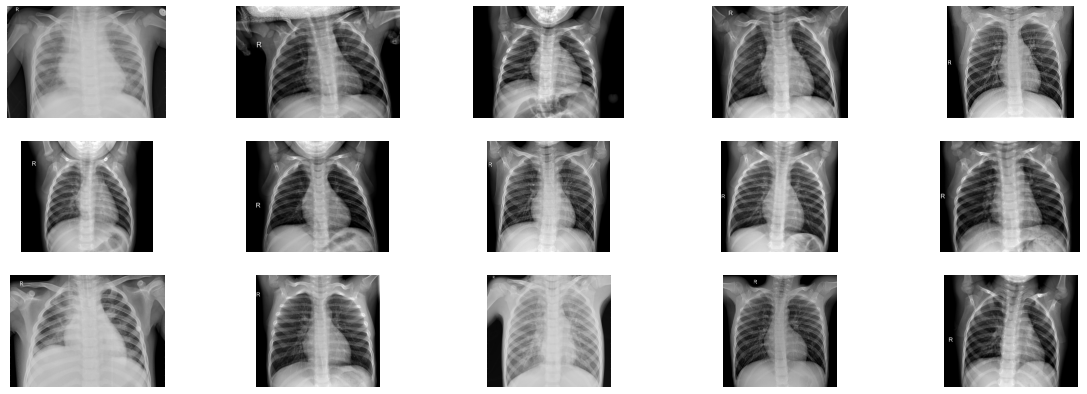

In [16]:
# plotando as imagens
plt.figure(figsize=(20,7))

# for i in range(15):
for i in range(num_images):
    plt.subplot(3, 5, 1 + i)
    plt.axis('off')
    plt.imshow(images[i])

plt.show()

In [17]:
# instanciando o caminho do diretório/pasta das imagens de treino
train_filepath = os.listdir('/content/raio_x_torax/raio-x-torax/treino/')

In [18]:
# criando uma lista para salvar as informações
categories = []

# realizando um laço de repetição e salvando na lista as informações
for f_names in train_filepath:
    category = f_names.split('.')[0]

    if category == 'pneumonia':
        categories.append(1)
    else:
        categories.append(0)

In [19]:
# importando biblioteca
import pandas as pd    # para manipulação e análise de dados

# versão da biblioteca 
print(pd.__version__)

1.3.5


In [20]:
# instanciando um dataframe com as informações em:
# 'filename': train_filepath
# 'category': categories

# utilizando o formato de dicionário para criar o dataframe
df = pd.DataFrame(
    {
        'filename': train_filepath,
        'category': categories
     
    }
)

# visualizando as 20 primeiras observações presentes no dataframe criado
df.head(20)

,filename,category
0,pneumonia.5.jpeg,1
1,normal.33.jpeg,0
2,normal.30.jpeg,0
3,normal.17.jpeg,0
4,normal.23.jpeg,0
5,normal.32.jpeg,0
6,normal.31.jpeg,0
7,normal.27.jpeg,0
8,normal.40.jpeg,0
9,normal.0.jpeg,0


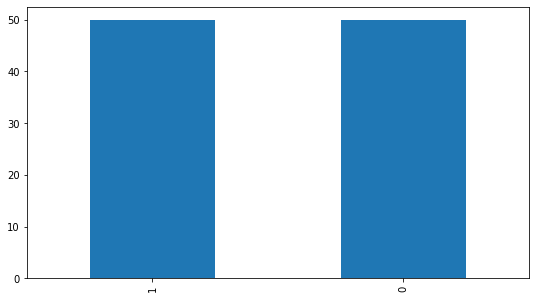

In [22]:
# plotando gráfico de barras da distribuição das instâncias presentes em cada classe
df['category'].value_counts().plot.bar(figsize=(9,5));

In [23]:
# visualizando a quantidade de observações e a frequência em cada classe
print(
    df['category'].value_counts(),
    df['category'].value_counts(normalize=True),
    sep='\n\n'
)

1    50
0    50
Name: category, dtype: int64

1    0.5
0    0.5
Name: category, dtype: float64


In [24]:
# atualizando o tensorflow
# !pip install tensorflow --upgrade

In [29]:
# importando o tensorflow
import tensorflow

# visualizando a versão da biblioteca
print(tensorflow.__version__)

2.8.0


In [31]:
# importando as funções necessárias para construção do modelo de RNA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
                                    Dropout, Flatten, Dense,\
                                    Activation, BatchNormalization

In [32]:
# instanciando as propriedades das imagens
image_widht = 128                           # largura da imagem
image_height = 128                          # altura da imagem
image_size = (image_widht, image_height)    # tamanho da imagem
image_channels = 3                          # quantidade de canais (cores - RGB)

In [33]:
# instanciando o modelo de rede neural artificial
model = Sequential()

In [34]:
# definindo as camadas da RNA
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(image_widht, image_height, image_channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

In [35]:
# compilando o modelo e definindo a função de perda, otimizador e a métrica
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [36]:
# visualizando o sumário geral do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [37]:
# importando as funções de parada e redução da taxa de aprendizagem
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [38]:
# instanciando a função de parada
early_stop = EarlyStopping(patience=30)

# instanciando a redução da taxa de aprendizagem
# métricas que podem ser utilizadas: loss,accuracy,val_loss,val_accuracy e lr
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                                     patience=2, verbose=1, 
                                                     factor=0.5, lr=0.1e-4) # 0.00001 = 0.1e-4

# instanciando o "callbacks" com os obejtos instanciados acima
callbacks=[early_stop, learning_rate_reduction]

In [39]:
# transformando as instâncias da variável alvo de numérico para categórico
df['category'] = df['category'].replace({0: 'normal', 1: 'pneumonia'})

In [40]:
# visualizando as instâncias únicas presentes na variável alvo
df['category'].unique()

array(['pneumonia', 'normal'], dtype=object)

In [41]:
# função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

In [42]:
# instanciando os dados de treino e validação
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)

In [43]:
# resetando os índices dos conjuntos de dados do treino e validação
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [44]:
# instanciando a quantidade de instâncias nos conjuntos de dados de treino teste
# total_train = train_df.shape[0]
# total_validate = validate_df.shape[0]
# batch_size = 10

total_train = len(train_df)
total_validate = len(validate_df)
batch_size = 10

# visualizando a quantidade de observações nos objetos
total_train, total_validate, batch_size

(80, 20, 10)

In [45]:
# importando as funções para RNA (rede neural artificial)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import to_categorical

In [46]:
# definindo o gerador de treino
train_datagenerator = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# visualizando o endereço de memória do objeto
train_datagenerator

In [47]:
# instanciando os dados do gerador de treino
train_generator = train_datagenerator.flow_from_dataframe(
    train_df,
    '/content/raio_x_torax/raio-x-torax/treino/',
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
train_generator

Found 80 validated image filenames belonging to 2 classes.


In [48]:
# definindo o gerador de validação
validation_datagenerator = ImageDataGenerator(rescale=1.0 / 255)

# visualizando o endereço de memória do objeto
validation_datagenerator

In [49]:
# definindo os dados do gerador de validação
validation_generator = validation_datagenerator.flow_from_dataframe(
    validate_df,
    '/content/raio_x_torax/raio-x-torax/treino/',
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
validation_generator

Found 20 validated image filenames belonging to 2 classes.


In [50]:
# definindo o gerador de teste
test_datagenerator = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# visualizando o endereço de memória do objeto
test_datagenerator

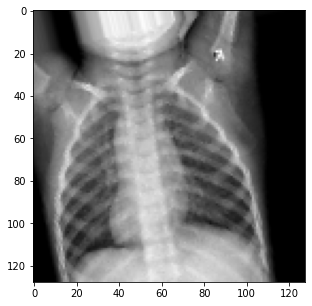

In [58]:
# plotando uma imagem do conjunto de dados de treino
X, y = train_generator.next()
plt.figure(figsize=(9,5))

for i in range(0,1):
    random_image = X[i]
    plt.imshow(random_image)
    plt.show()

In [59]:
# definindo o número de épocas para o treinamento da RNA
epochs=150

# realizando o treinamento do modelo
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)

Epoch 1/150
8/8 [==============================] - 8s 815ms/step - loss: 0.3488 - accuracy: 0.9000 - val_loss: 4.1459 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/150
8/8 [==============================] - 6s 737ms/step - loss: 0.4529 - accuracy: 0.9000 - val_loss: 4.7518 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 3/150
8/8 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9875
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
8/8 [==============================] - 6s 745ms/step - loss: 0.0124 - accuracy: 0.9875 - val_loss: 10.3673 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 4/150
8/8 [==============================] - 6s 740ms/step - loss: 0.1185 - accuracy: 0.9750 - val_loss: 14.0217 - val_accuracy: 0.5500 - lr: 5.0000e-04
Epoch 5/150
8/8 [==============================] - ETA: 0s - loss: 0.2025 - accuracy: 0.9625
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
8/8 [==============================] - 6s 748ms/step

In [60]:
# se necessário instalar a biblioteca "h5py" descomente o código abaixo
# pip install h5py --upgrade

In [61]:
# # importando biblioteca
# import h5py      # para salvar o modelo

# # realizando teste de funcionalidade da biblioteca
# # 0: não
# #1: sim
# h5py.run_tests()

In [62]:
# salvando o modelo
# model.save('model_1_pneumonia.h5py')
model.save('model_1_pneumonia.h5')

In [63]:
# instanciando os dados de teste
test_filepath = os.listdir('/content/raio_x_torax/raio-x-torax/teste/')

In [64]:
# instanciando um dataframe com os dados de teste
test_df = pd.DataFrame(
    {'filename': test_filepath}
)

# visualizando as 5 últimas observações
test_df.tail()

,filename
45,8.jpeg
46,20.jpeg
47,48.jpeg
48,14.jpeg
49,19.jpeg


In [65]:
# instanciando os dados do gerador de teste
test_generator = train_datagenerator.flow_from_dataframe(
    test_df,
    '/content/raio_x_torax/raio-x-torax/teste/',
    x_col='filename',
    y_col=None,
    target_size=image_size,
    class_mode=None,
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
test_generator

Found 50 validated image filenames.


In [66]:
# definindo o número de amostras
nb_samples = test_df.shape[0]
nb_samples # visualizando a quantidade de amostras

50

In [67]:
# realizando as predições com o modelo
predict = model.predict(test_generator, steps=np.ceil(nb_samples / batch_size))
predict # visualizando as predições

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [68]:
# realizando a conversão dos rótulos (labels) de numérico para categórico
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((values, keys) for keys, values in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace(
    {'pneumonia': 1, 'normal': 0}
)

# visualizando o dataframe criado
test_df

,filename,category
0,38.jpeg,1
1,18.jpeg,1
2,21.jpeg,1
3,43.jpeg,1
4,15.jpeg,1
5,49.jpeg,1
6,36.jpeg,1
7,33.jpeg,1
8,17.jpeg,1
9,50.jpeg,1


In [69]:
# instanciando 18 imagens da dataframe "test_df"
# sample_test = test_df.head(18)
sample_test = test_df.sample(18)

# resetando os índices
sample_test = sample_test.reset_index(drop=True)
sample_test # visualizando os dados das amostras selecionadas

,filename,category
0,10.jpeg,1
1,45.jpeg,1
2,14.jpeg,1
3,13.jpeg,1
4,1.jpeg,1
5,21.jpeg,1
6,5.jpeg,1
7,38.jpeg,1
8,4.jpeg,1
9,30.jpeg,1


In [70]:
# importando a função para leitura de imagem
from tensorflow.keras.preprocessing.image import load_img

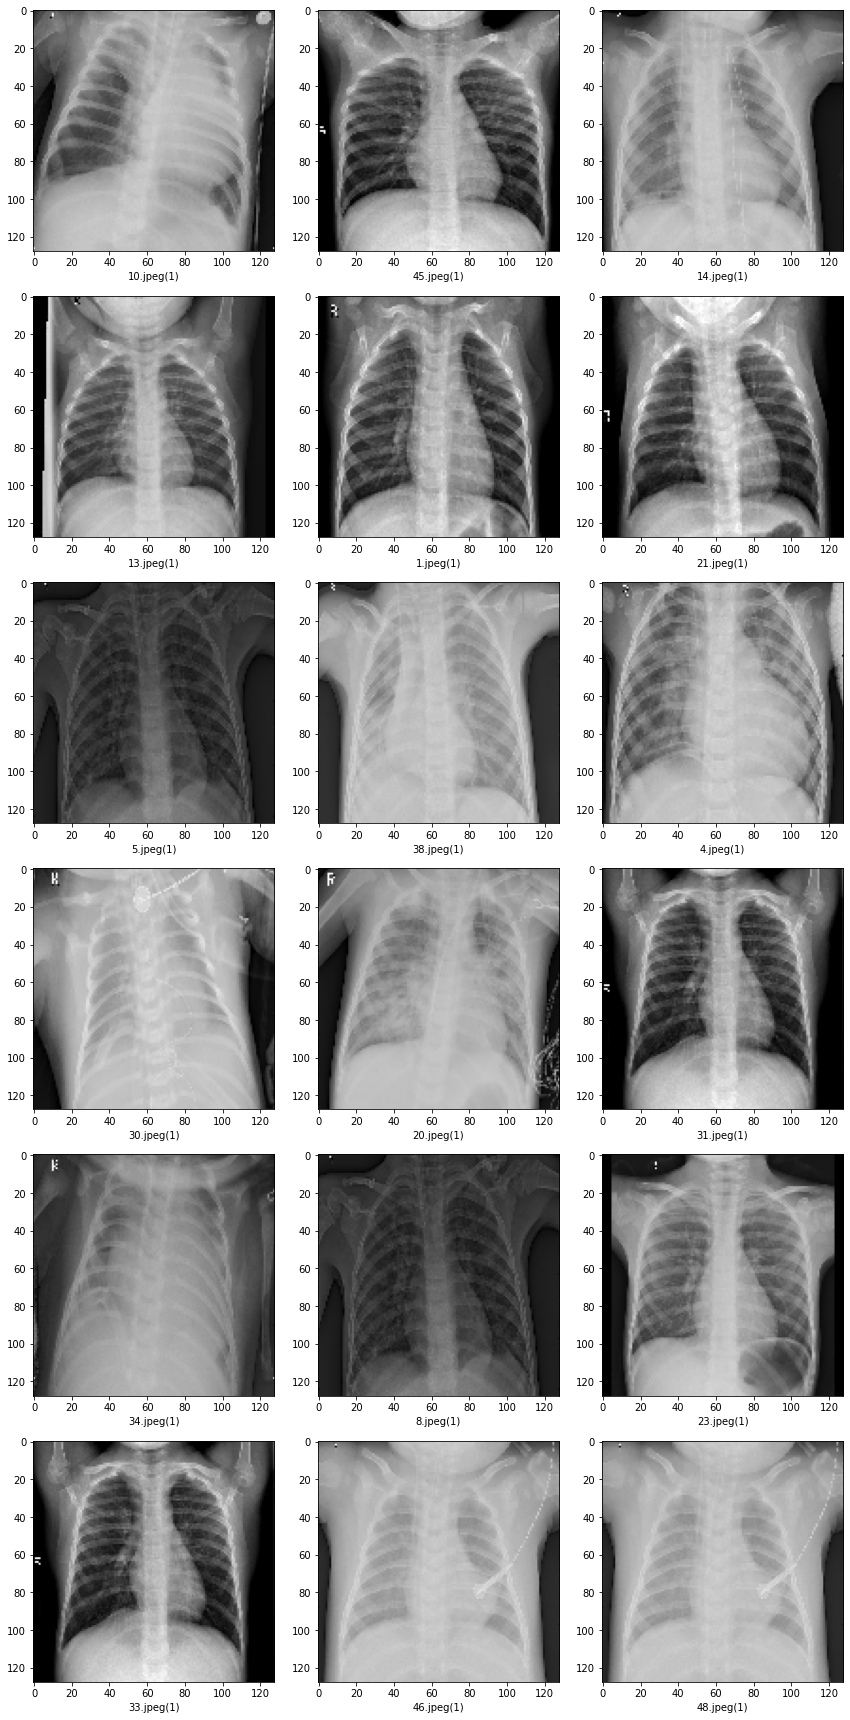

In [71]:
# plotando as 18 imagens da amostra
plt.figure(figsize=(12,24))

for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']

    img = load_img('/content/raio_x_torax/raio-x-torax/teste/' + filename, target_size=image_size)

    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')

plt.tight_layout()
plt.show()

In [72]:
# importando as bibliotecas
import numpy as np
import tensorflow as tf
import cv2

from PIL import Image
from tensorflow import keras

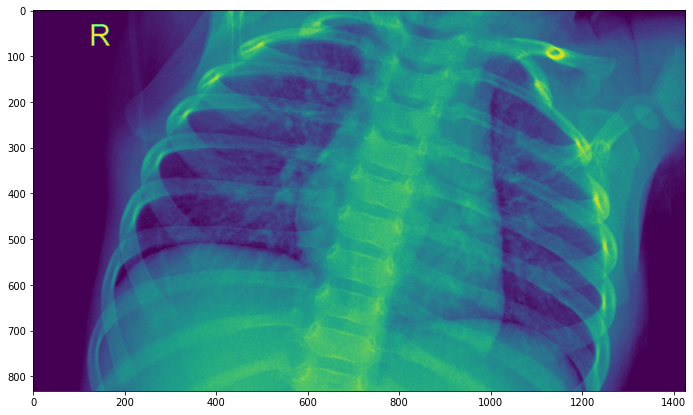

In [74]:
# instanciando uma imagem
i = Image.open('/content/raio_x_torax/raio-x-torax/teste/11.jpeg')

plt.figure(figsize=(12,7))

plt.imshow(i)
plt.show()
# i    # visualizando a imagem

In [75]:
# redimensionado a imagem
item = i.resize(image_size)
# item = (np.random.standard_normal([128,128,3]) * 255).astype(np.uint8)
item = (np.random.standard_normal([128,128,3]) * 255)
item = np.expand_dims(item, axis=0)
item = np.array(item)
item = item / 255

pred_item = model.predict([item])[0]
pred_item

array([6.481898e-07, 9.999994e-01], dtype=float32)

Diagnóstico indicado: RX pneumonia


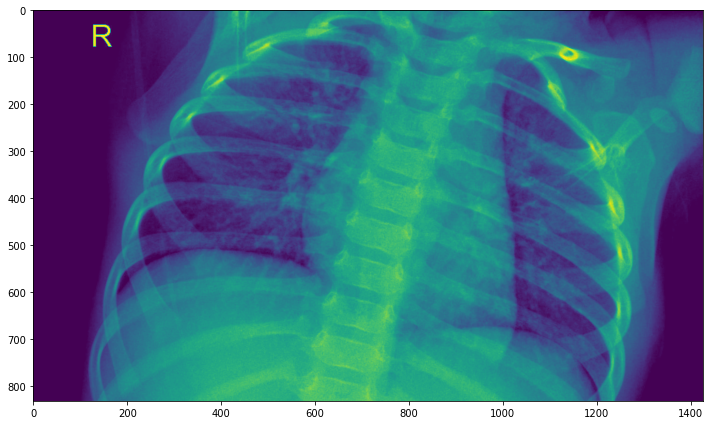

In [76]:
# plotando a imagem e seu dignóstico
if pred_item[0] > pred_item[1]:
    print('Diagnóstico indicado: RX normal')
else:
    print('Diagnóstico indicado: RX pneumonia')

plt.figure(figsize=(12,24))
plt.imshow(i)
plt.show()

In [77]:
# importando as bibliotecas
import numpy as np
import os
import tkinter as tk

from tkinter import *
from tkinter import filedialog
from PIL import ImageTk, Image
from tensorflow.keras.models import load_model

In [78]:
# carregando o modelo no objeto "modelo"
model = load_model('model_1_pneumonia.h5')
# model = load_model('model_1_pneumonia.h5py')
model   # visualizando o endereço de memória do objeto

In [ ]:
# iniciando o ambiente GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Classificação para raio-x de tórax')
top.configure(background='#CDCDCD')
label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

In [ ]:
# função para classificar a imagem
def classify(file_path):
    global label_packed
    
    image = Image.open(file_path)
    image = (np.random.standard_normal([128,1128,3]) * 255)
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    image = image / 255
    
    pred = model.predict([image])[0]
    
    basename = os.path.basename(file_path)
    
    name = int(basename.rsplit('.', 1)[0])
    
    if pred[0] > pred[1]:
        sign = 'Diagnóstico indicado: RX normal'
    else:
        sign = 'Diagnóstico indicado: RX pneumonia'
        
    print(sign)
        
    label.configure(foreground='#011638', text=f'{sign} {str(max(pred * 100))} {str("%")}') 

In [ ]:
# função para exibição da janela
def show_classify_button(file_path):
    classify_b = Button(top, text='Classificar imagem', command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

In [ ]:
# função para realizar o carregamento da imagem
def upload_image():
    try:
        file_path = filedialog.askoponfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnai(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))
        
        img = ImageTk.PhotoImage(uploaded)
        sign_image.configue(image=img)
        sign_image.image = img
        label.configue(text='')
        show_classify_button(file_path)
        
    except:
        pass

In [ ]:
# gerando a janela para carregamento da imagem
upload = Button(top, text='Upload da imagem',command=upload_image, padx=10, pady=5)

upload.configure(background='#364156', foreground='white',font=('arial' ,10, 'bold'))
upload.pack(side=BOTTOM,pady=50)

sign_image.pack(side=BOTTOM,expand=True)

label.pack(side=BOTTOM,expand=True)

heading = Label(top, text='Classificação para raio-x de tórax',pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()